<a href="https://colab.research.google.com/github/vethssvikas/Work-done-in-DS-internship/blob/main/Textual_Representations_of_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import spacy
nlp = spacy.load("en_core_web_sm")
from textblob import TextBlob

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis.csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['sentiment_analysis.csv']))

In [ ]:
df2.head()

,Review Text
0,Best learning app for students
1,Wonderful app. Waiting for general release
2,Best e-learning app.
3,Best e-learning app
4,Awesome


In [ ]:
df2.size

3757

In [ ]:
def sentiment_calculator(df2, aspects): #wrapper function for calculating the sentiment polarity score

  def print_type(df2): #prints the nouns, verbs, adjectives present in each feedback
    for i in range(3602):
      for s in df2.loc[i]:
        doc = nlp(s)
        for token in doc:
          print(token.text, token.dep_, token.head.text, token.head.pos_, token.pos_,[child for child in token.children])

  def aspect_and_desp(df2, aspects): #calclates the aspect and the description for the aspect
    for i in range(3602):
      for s in df2.loc[i]:
         doc = nlp(s)
         descriptive_term = ''
         target = ''
         for token in doc:
            if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
               target = token.text
            if token.pos_ == 'ADJ':
               prepend = ''
            for child in token.children:
               if child.pos_ != 'ADV':
                 continue
               prepend += child.text + ' '
      descriptive_term = prepend + token.text
      aspects.append({'aspect': target,'description': descriptive_term})
  
  def sentiment(aspects): #calculates the polarity score for each sentiment
    for aspect in aspects:
      aspect['polarity'] = TextBlob(aspect['description']).sentiment.polarity
      aspect['subjective'] = TextBlob(aspect['description']).sentiment.subjectivity

  #print_type(df2)
  aspect_and_desp(df2,aspects)
  sentiment(aspects)
  print(aspects)


In [ ]:
aspects = []
sentiment_calculator(df2, aspects)  #printing the aspects and the score for the given csv file

[{'aspect': '', 'description': 'students', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': 'release', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': '.', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': 'app', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': 'Awesome', 'polarity': 1.0, 'subjective': 1.0}, {'aspect': '', 'description': '..', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': 'release', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': 'life', 'description': '😁', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': '.', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': 'students', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': 'Excellent', 'polarity': 1.0, 'subjective': 1.0}, {'aspect': '', 'description': 'paltform', 'polarity': 0.0, 'subjective': 0.0}, {'aspect': '', 'description': 'app', 'polarity': 0.0, 'subjective': 0.0}, {'aspec

# BIGRAM AND TRIGRAM REPRESENTATION

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though']
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df2['Review Text'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram or trigram'})

df_ngram['polarity'] = df_ngram['bigram or trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram or trigram'].apply(lambda x: TextBlob(x).subjectivity)

,frequency,bigram or trigram,polarity,subjective
0,270,good app,0.7,0.6
1,223,nice app,0.6,1.0
2,200,online classes,0.0,0.0
3,188,best app,1.0,0.3
4,184,worst app,-1.0,1.0
...,...,...,...,...
47582,1,10 05 consumed,0.0,0.0
47583,1,10 05,0.0,0.0
47584,1,05 consumed 50,0.0,0.0
47585,1,05 consumed,0.0,0.0


# FIRST 10 POSITIVE AND NEGATIVE REVIEWS

In [ ]:
df_ngram.nlargest(10, ['polarity'])

,frequency,bigram or trigram,polarity,subjective
3,188,best app,1.0,0.3
16,70,best learning,1.0,0.3
17,64,excellent app,1.0,1.0
23,58,best learning app,1.0,0.3
27,54,app best,1.0,0.3
28,52,wonderful app,1.0,1.0
36,44,one best,1.0,0.3
68,26,best app learning,1.0,0.3
71,23,app best app,1.0,0.3
87,20,superb app,1.0,1.0


In [ ]:
df_ngram.nsmallest(10, ['polarity'])

,frequency,bigram or trigram,polarity,subjective
4,184,worst app,-1.0,1.0
37,43,worst app ever,-1.0,1.0
73,22,worst experience,-1.0,1.0
126,16,app worst,-1.0,1.0
132,15,worst app world,-1.0,1.0
316,9,app worst app,-1.0,1.0
324,8,worst app never,-1.0,1.0
402,7,worst experience app,-1.0,1.0
403,7,worst app seen,-1.0,1.0
647,5,worst learning,-1.0,1.0


# Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation


# NMS REPRESENTATION

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, nmf)
pipe.fit(df2['Review Text'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: nice app, nice app students, nice app learning
Topic #1: good app, good app learning, app learning
Topic #2: worst app, worst app ever, app ever



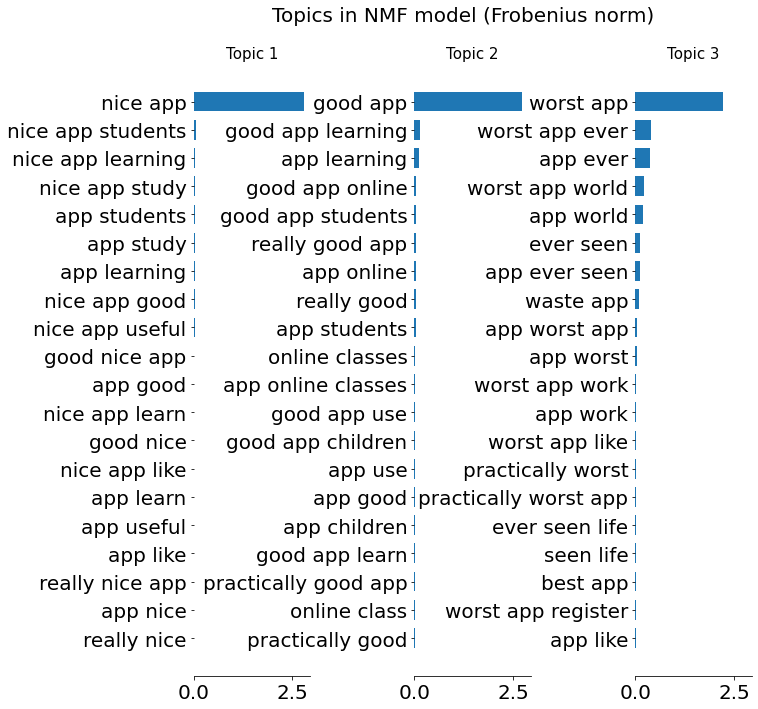

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


plot_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_,
               'Topics in NMF model (Frobenius norm)')


# LDA REPRESENTATION

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df2['Review Text'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=5)

Topic #0: waste app, best app, excellent app, learning app, great app
Topic #1: nice app, good app, worst app, super app, like app
Topic #2: bad app, worst app, learning app, best app, online classes



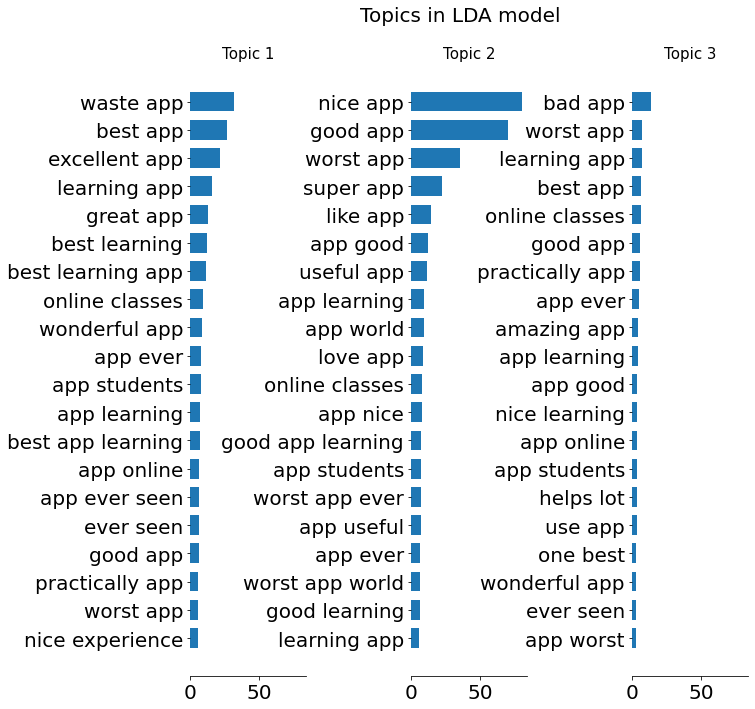

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
plot_top_words(lda,tfidf_vectorizer.get_feature_names() , n_top_words, 'Topics in LDA model')